In [129]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, normalize
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV
import pickle

In [130]:
with open("ccdf3.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [131]:
with open("ccdf_upsampled_train.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [132]:
with open("ccdf_upsampled_test.pkl", 'rb') as picklefile: 
    ccdf_up_test = pickle.load(picklefile)
    
    
X_up_test = normalize(ccdf_up_test.drop('default',1))
y_up_test = ccdf_up_test.default

In [133]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [134]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [135]:
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [136]:
X = normalize(ccdf.drop('default',1))
y = ccdf['default']

X_up_train = normalize(ccdf_up.drop('default',1))
y_up_train = ccdf_up['default']

X_down = normalize(ccdf_down.drop('default',1))
y_down = ccdf_down['default']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.4, random_state=42)

In [138]:
#Decision tree classifier
log = LogisticRegression(tol = .00000000001)
fit = log.fit(X_train, y_train)
yhat = fit.predict(X_test)
log_score = fit.score(X_test, y_test)
print(log_score)

0.775930053146


Training Data Accuracy: 0.77
Test Data Accuracy:     0.78
[[6863    0]
 [1886    0]]


Precision:              0.78
Recall:                 1.00


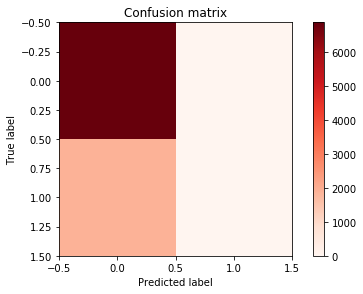

In [139]:
train_score(log,X,y)

Text(0,0.5,'TPR')

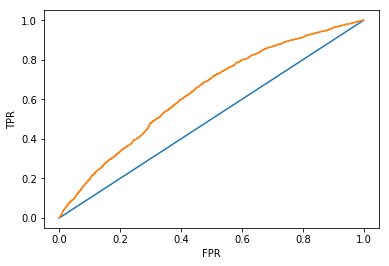

In [140]:
# What about ROC ? 
y_score=log.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [141]:
roc_auc

0.63657912829419494

In [142]:
#Decision tree classifier
log = LogisticRegression(tol = .00000000001)
fit = log.fit(X_up_train, y_up_train)
yhat = fit.predict(X_up_test)
log_up_score = fit.score(X_up_test, y_up_test)
print(log_up_score)

0.622590865088


Training Data Accuracy: 0.67
Test Data Accuracy:     0.66
[[2417  962]
 [1308 2085]]


Precision:              0.65
Recall:                 0.72


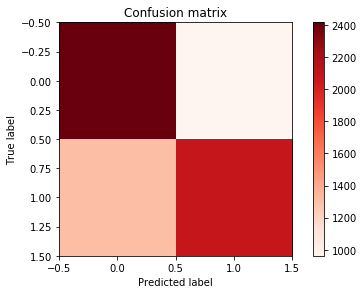

In [143]:
train_score(log,X_up,y_up)

Text(0,0.5,'TPR')

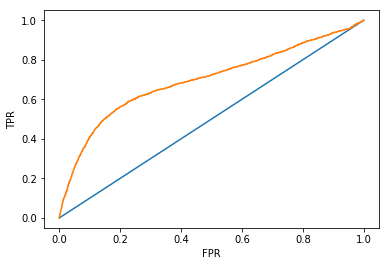

In [144]:
# What about ROC ? 
y_up_score=log.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [145]:
roc_auc

0.69675575017099312

In [146]:
print(classification_report(y_up_test, log.predict(X_up_test)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     11363
          1       0.50      1.00      0.67     11363

avg / total       0.25      0.50      0.33     22726



/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [147]:
#Decision tree classifier
log = LogisticRegression(tol = .00000000001)
fit = log.fit(X_down_train, y_down_train)
yhat = fit.predict(X_down_test)
log_down_score = fit.score(X_down_test, y_down_test)
print(log_down_score)

0.608019953952


Training Data Accuracy: 0.62
Test Data Accuracy:     0.60
[[1256  696]
 [ 865 1092]]


Precision:              0.59
Recall:                 0.64


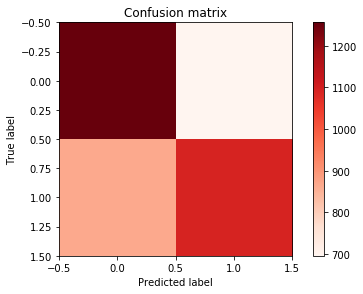

In [148]:
train_score(log,X_down,y_down)

Text(0,0.5,'TPR')

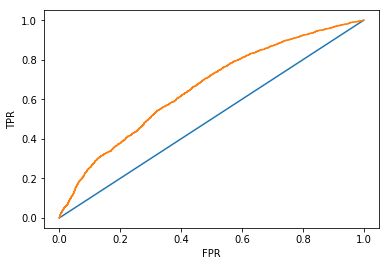

In [149]:
# What about ROC ? 
y_down_score=log.predict_proba(X_down_test)[:,1]

fpr_down, tpr_down,_ = roc_curve(y_down_test, y_down_score)
roc_auc = auc(fpr_down, tpr_down)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_down,tpr_down)
plt.xlabel('FPR')
plt.ylabel('TPR')

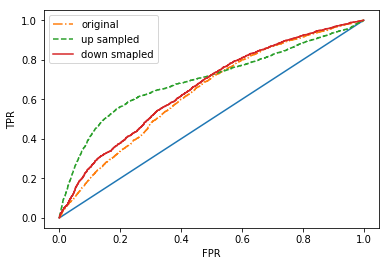

In [150]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'original', linestyle = '-.')
plt.plot(fpr_up,tpr_up, label = 'up sampled', linestyle = '--')
plt.plot(fpr_down,tpr_down, label = 'down smapled')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();

In [151]:
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=5
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver = 'newton-cg'
        
        
    )
searchCV.fit(X_up_train, y_up_train)

print ('Max auc_roc:', searchCV.scores_[1].mean(axis=0).max()) 

Max auc_roc: 0.72773641359


In [152]:
searchCV.C_

array([  1.00000000e+09])

In [158]:
#Decision tree classifier
log = LogisticRegression(C=1e9, solver='newton-cg',tol = .00000000001)
fit = log.fit(X_up_train, y_up_train)
yhat_up = fit.predict(X_up_test)
log_up_score = fit.score(X_up_test, y_up_test)
print(log_up_score)

0.67332570624


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Text(0,0.5,'TPR')

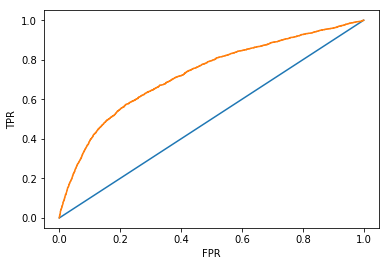

In [159]:
# What about ROC ? 
y_up_score=log.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [160]:
roc_auc

0.72661107550580439

[[8430 2933]
 [4491 6872]]


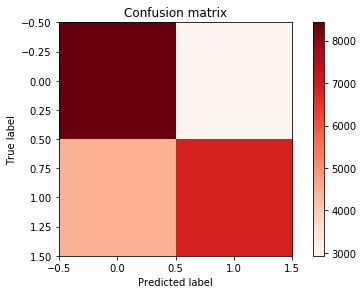

In [161]:
cm=confusion_matrix(y_up_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [168]:
df = ccdf.drop('default',1)

In [169]:
i = 0
while i < len(df.columns):
    print(str(df.columns[i]) + '=' + str(log.coef_[0][i]))
    i = i+1

LIMIT_BAL=-1.29500570683
SEX=-3.84074313975
MARRIAGE=-1750.63262926
AGE=10339.6421493
PAY_0=-12651.8425506
PAY_2=431.384508909
PAY_3=36713.4021687
PAY_4=9399.22856725
PAY_5=8323.06526406
PAY_6=5904.68758992
BILL_AMT1=2833.12373947
BILL_AMT2=-6332.55954868
BILL_AMT3=-3286.37400408
BILL_AMT4=-1641.82323722
BILL_AMT5=-0.842750714058
BILL_AMT6=1640.37708247
PAY_AMT1=3282.19269094
PAY_AMT2=0.663757964641
PAY_AMT3=3279.45326275
PAY_AMT4=1638.74166554
PAY_AMT5=-1.57244915776
PAY_AMT6=-1644.32176929
UNIVERSITY=-3286.68374368
GRADUATE=-1.30597848835
slope=14479.341385


In [216]:
#TOLERANCE TESTING
#Decision tree classifier
log = LogisticRegression(C=1e9, solver='newton-cg',tol = .00000000001)
fit = log.fit(X_up_train, y_up_train)
yhat_up = fit.predict(X_up_test-.0000001)
log_up_score = fit.score(X_up_test, y_up_test)
print(log_up_score)

0.67332570624


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[[8506 2857]
 [4534 6829]]


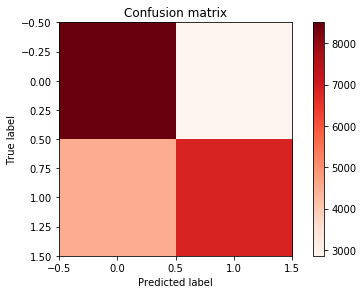

In [217]:
cm=confusion_matrix(y_up_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

Text(0,0.5,'TPR')

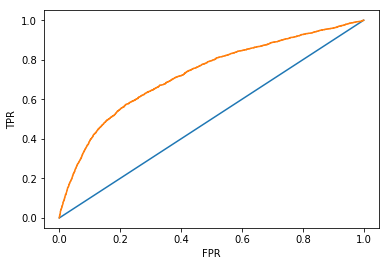

In [221]:
# What about ROC ? 
y_up_score=log.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,m = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [213]:
roc_auc

0.72661107550580439

In [279]:
def predict_with_cutoff(y_prob, threshold):
    y_pred = [1 if x >= threshold else 0 for x in y_prob]
    return y_pred

In [305]:
def cost(tn, fp, fn, tp):
    cost = tp + (tn * .05) - (fp * .95) - (fn * .05)
    return cost

In [297]:
m = np.linspace(0,1,50)

In [298]:
len(m)

50

In [299]:
yhat = []
y_score = log.predict_proba(X_up_test)[:,1]
for i in m:
    yhat.append(predict_with_cutoff(y_score, i))

In [300]:
len(yhat)


50

In [301]:
with open('yhat.pkl', 'wb') as f:
      pickle.dump(yhat, f)

In [287]:
cost_list = []
for i in yhat:
    tn, fp, fn, tp=confusion_matrix(y_up_test, i, labels=None)
    cost_list.append(cost(tn, fp, fn, tp))

In [270]:
index = 0
for i in cost_list:
    if max(cost_list) == i:
        ind = index
        index = index + 1
    else:
        index = index + 1

In [304]:
cm

array([[    0, 11363],
       [    0, 11363]])

In [306]:
10906.05/len(X_up_test)

0.47989307401214465

In [272]:
m[ind]

0.99991455124498885

In [275]:
ind

10

In [314]:
yhat_up = predict_with_cutoff(y_up_score, .02)

[[   10 11353]
 [    8 11355]]


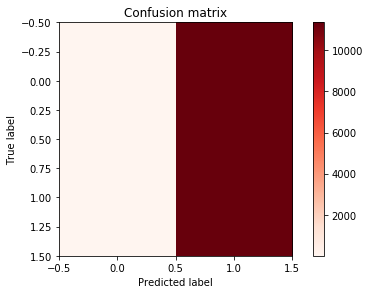

In [315]:
cm=confusion_matrix(y_up_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [313]:
m

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])